In [9]:
import matplotlib.pyplot as plt
from My_Key import Personal_Key
import requests

In [10]:
def get_data():
    url = f"https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=EUR&apikey=" + Personal_Key
    response = requests.get(url)
    values = response.json()
    print(values)  # This will print the whole response from the API
    return values

# Get the data from the API
data = get_data()

{'Meta Data': {'1. Information': 'Daily Prices and Volumes for Digital Currency', '2. Digital Currency Code': 'BTC', '3. Digital Currency Name': 'Bitcoin', '4. Market Code': 'EUR', '5. Market Name': 'Euro', '6. Last Refreshed': '2025-02-06 00:00:00', '7. Time Zone': 'UTC'}, 'Time Series (Digital Currency Daily)': {'2025-02-06': {'1. open': '92825.26000000', '2. high': '93548.69000000', '3. low': '92825.26000000', '4. close': '93431.33000000', '5. volume': '9.01693339'}, '2025-02-05': {'1. open': '94354.79000000', '2. high': '95370.42000000', '3. low': '92500.00000000', '4. close': '92832.17000000', '5. volume': '412.93929358'}, '2025-02-04': {'1. open': '98376.01000000', '2. high': '98752.51000000', '3. low': '92717.21000000', '4. close': '94347.30000000', '5. volume': '520.98220008'}, '2025-02-03': {'1. open': '95431.64000000', '2. high': '99421.84000000', '3. low': '89248.90000000', '4. close': '98421.52000000', '5. volume': '1044.41324300'}, '2025-02-02': {'1. open': '97315.45000000

In [11]:
# 'Time Series (Daily)' is the key where the date-based data is located in the API response
time_series = data.get("Time Series (Digital Currency Daily)", {})
time_series

{'2025-02-06': {'1. open': '92825.26000000',
  '2. high': '93548.69000000',
  '3. low': '92825.26000000',
  '4. close': '93431.33000000',
  '5. volume': '9.01693339'},
 '2025-02-05': {'1. open': '94354.79000000',
  '2. high': '95370.42000000',
  '3. low': '92500.00000000',
  '4. close': '92832.17000000',
  '5. volume': '412.93929358'},
 '2025-02-04': {'1. open': '98376.01000000',
  '2. high': '98752.51000000',
  '3. low': '92717.21000000',
  '4. close': '94347.30000000',
  '5. volume': '520.98220008'},
 '2025-02-03': {'1. open': '95431.64000000',
  '2. high': '99421.84000000',
  '3. low': '89248.90000000',
  '4. close': '98421.52000000',
  '5. volume': '1044.41324300'},
 '2025-02-02': {'1. open': '97315.45000000',
  '2. high': '98204.16000000',
  '3. low': '93671.33000000',
  '4. close': '95427.29000000',
  '5. volume': '528.57621392'},
 '2025-02-01': {'1. open': '98887.87000000',
  '2. high': '99249.00000000',
  '3. low': '96977.14000000',
  '4. close': '97328.62000000',
  '5. volume'

In [12]:
# Extract dates and opening values
dates = []
open = []
High = []
Low = []
Close = []
Volume = []

# Ensure data is structured correctly (values should be a dictionary with '1. open' key)

for date, daily_values in time_series.items():
    if isinstance(daily_values, dict) and '1. open' in daily_values:
        dates.append(date)
        open.append(float(daily_values["1. open"]))
        High.append(float(daily_values['2. high']))
        Low.append(float(daily_values['3. low']))
        Close.append(float(daily_values['4. close']))
        Volume.append(float(daily_values['5. volume']))
        
    else:
        print(f"Unexpected structure for {date}: {daily_values}")

# Reverse the dates and opening values if needed to get the chronological order
dates.reverse()
open.reverse()
High.reverse()
Low.reverse()
Close.reverse()
Volume.reverse()

Close


[46873.1,
 47632.45,
 47803.84,
 49979.74,
 52587.36,
 57460.8,
 56477.23,
 57572.75,
 57211.22,
 58227.89,
 62779.25,
 58821.41,
 60629.09,
 61027.58,
 62408.25,
 62553.18,
 63064.25,
 65689.34,
 65424.91,
 66772.14,
 65631.65,
 63873.31,
 59904.06,
 62799.62,
 62167.44,
 56992.73,
 62104.86,
 60311.85,
 59092.76,
 59270.27,
 62197.99,
 64434.81,
 64578.78,
 64187.14,
 65616.11,
 64804.53,
 64567.04,
 66099.78,
 64909.14,
 60853.75,
 60944.89,
 63262.09,
 62635.57,
 63613.31,
 64048.85,
 65914.02,
 63710.86,
 65761.16,
 65278.57,
 63328.63,
 61007.42,
 61867.6,
 59747.5,
 60117.86,
 57485.91,
 59694.8,
 59991.74,
 61075.19,
 60953.54,
 62755.47,
 62068.17,
 60083.17,
 60126.24,
 59635.8,
 59364.4,
 58947.56,
 59549.34,
 56852.18,
 54372.6,
 55082.13,
 58507.14,
 59392.98,
 59506.98,
 58681.47,
 57961.38,
 56949.08,
 58521.43,
 56514.18,
 56496.94,
 57075.98,
 58293.8,
 56924.05,
 60777.05,
 60018.57,
 61687.99,
 61579.64,
 60927.75,
 65521.16,
 64375.99,
 63816.0,
 62836.76,
 63232.74

In [13]:
import pandas as pd
Bitcoin = pd.DataFrame({'date' : dates, 'Open' : open, 'High' : High, 'Low' : Low, 'Close' : Close, 'Volume': Volume})
Bitcoin.info()

# Convert "Date" to a datetime object for proper plotting
Bitcoin["date"] = pd.to_datetime(Bitcoin["date"])

#create csv file
#Bitcoin.to_csv('Bitcoin_csv', index= False)

Bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    350 non-null    object 
 1   Open    350 non-null    float64
 2   High    350 non-null    float64
 3   Low     350 non-null    float64
 4   Close   350 non-null    float64
 5   Volume  350 non-null    float64
dtypes: float64(5), object(1)
memory usage: 16.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    350 non-null    datetime64[ns]
 1   Open    350 non-null    float64       
 2   High    350 non-null    float64       
 3   Low     350 non-null    float64       
 4   Close   350 non-null    float64       
 5   Volume  350 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 16.5 KB


In [14]:
# Assuming 'Bitcoin' DataFrame has a 'date' column in datetime format # already in above tab
# Bitcoin['date'] = pd.to_datetime(Bitcoin['date'])

# Get the current date
current_date = pd.to_datetime('today')

# Filter the data to include only the last 6 months
six_months_ago = current_date - pd.DateOffset(months=6)
Bitcoin_last_6_months = Bitcoin[Bitcoin['date'] >= six_months_ago]

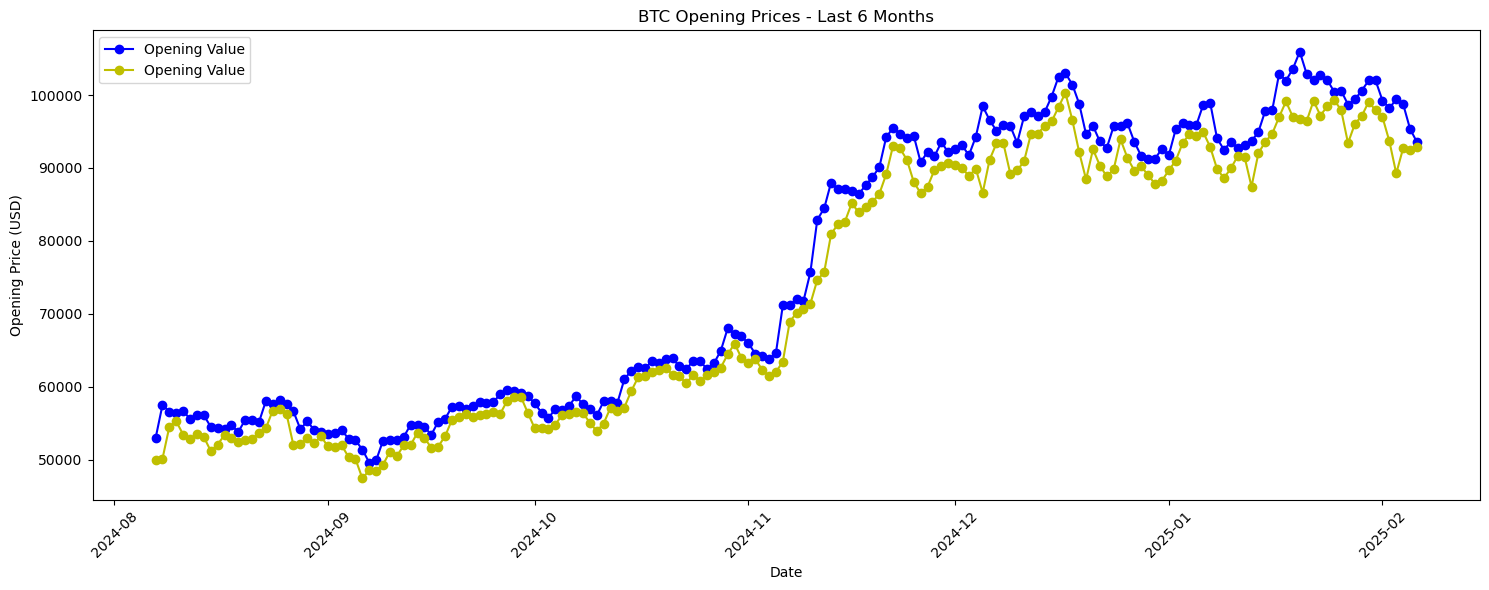

In [15]:

# Plot the line graph
plt.figure(figsize=(15,6))
plt.plot(Bitcoin_last_6_months['date'], Bitcoin_last_6_months['High'], marker='o', color='b', label='Opening Value')
plt.plot(Bitcoin_last_6_months['date'], Bitcoin_last_6_months['Low'], marker='o', color='y', label='Opening Value')
plt.title('BTC Opening Prices - Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()
plt.tight_layout()

# Show the graph
plt.show()

In [16]:
## To shift further page numbers
base_url = ## here need to put basic irl of website
page_number = 1
while True :
    url = f"{base_url}catalogue/page-{page_number}.html"
    response = requests.get(url)
    print (page_number, response)
    page_number += 1
    if response.status_code != 200:
        break
    ## here would be rest of scrapping code

SyntaxError: invalid syntax (1036369351.py, line 2)